In [1]:
import geopandas as gpd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display
from ipywidgets import interact, widgets
from IPython.display import display, clear_output
import seaborn as sns

In [4]:
df=pd.read_csv(r'..\..\data\Cleaned_data\cancat_Update_DS.csv')

In [5]:
df.head()

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,Southern,Monaragala,Katharagama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults
1,2,Southern,Monaragala,Thanamalvila,2010-01-07,Unknown,Male,20,Subadults and adults
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults
3,4,Eastern,Ampara,Thirukkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults
4,5,North Western,Kurunegala,Ipalogama,2010-01-15,Accident,Male,5,Juvenile


In [6]:
df=df[df["Cause of Death"]!='Unknown']

In [7]:
#Create a cross-tabulation of cause of death and age category
cross_tab = pd.crosstab(df['Cause of Death'], df['Age Category'])

<Figure size 1200x800 with 0 Axes>

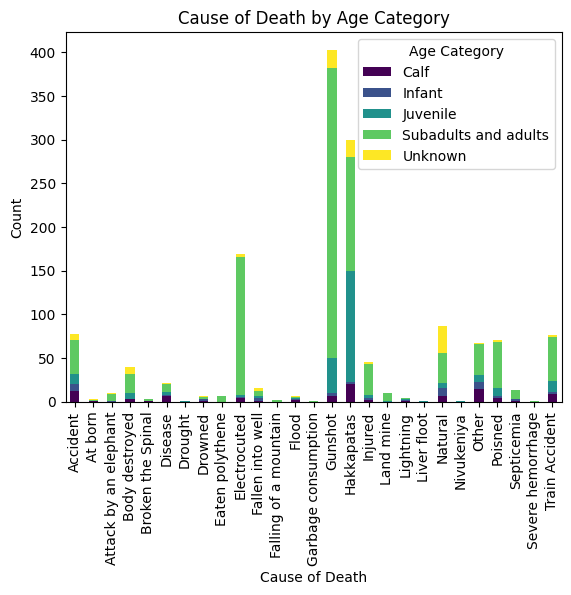

In [8]:
#Plot a stacked bar chart for visual representation
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Cause of Death by Age Category')
plt.xlabel('Cause of Death')
plt.ylabel('Count')
plt.legend(title='Age Category')
plt.show()

In [9]:
grouped = df.groupby(['Age Category'])

In [10]:
cause_counts = grouped['Cause of Death'].value_counts().unstack(fill_value=0)


In [11]:
cause_counts

Cause of Death,Accident,At born,Attack by an elephant,Body destroyed,Broken the Spinal,Disease,Drought,Drowned,Eaten polythene,Electrocuted,...,Land mine,Lightning,Liver floot,Natural,Nivukeniya,Other,Poisned,Septicemia,Severe hemorrhage,Train Accident
Age Category,,,,,,,,,,,,,,,,,,,,,
Calf,12,1,0,3,1,6,0,1,0,4,...,0,1,0,6,0,14,4,1,0,9
Infant,8,0,1,0,0,2,0,2,0,1,...,0,1,0,10,0,8,2,2,0,2
Juvenile,12,0,0,7,0,3,1,0,0,3,...,1,1,1,5,1,9,10,0,0,13
Subadults and adults,38,1,8,22,2,9,0,2,6,157,...,9,1,0,35,0,35,52,10,1,50
Unknown,7,1,1,8,0,1,0,1,0,4,...,0,0,0,31,0,1,3,0,0,2


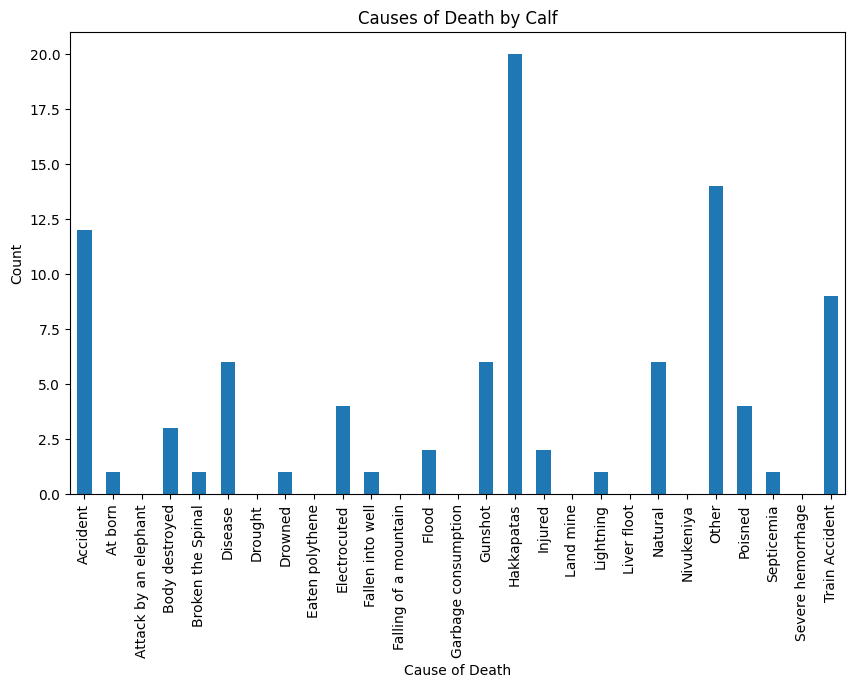

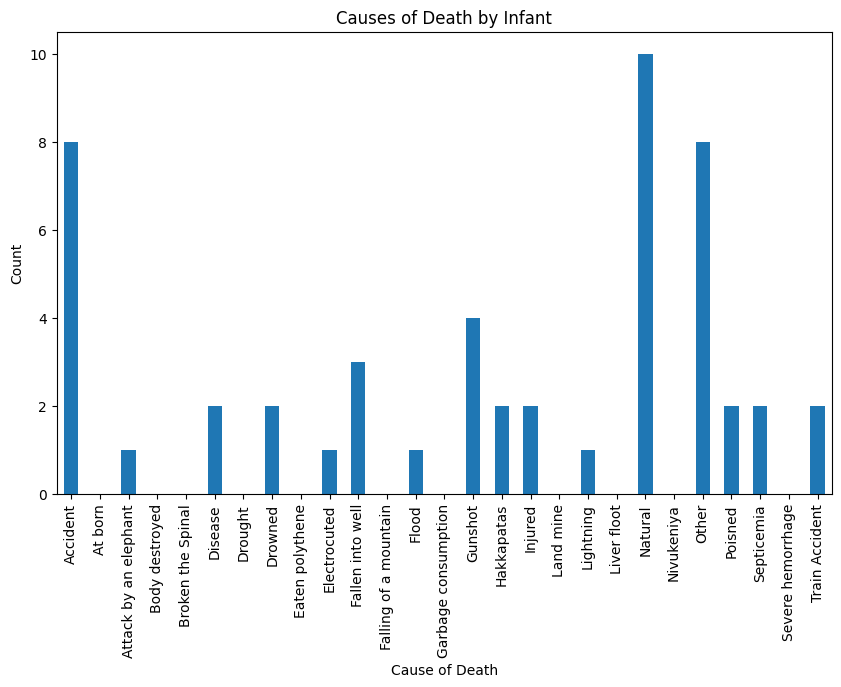

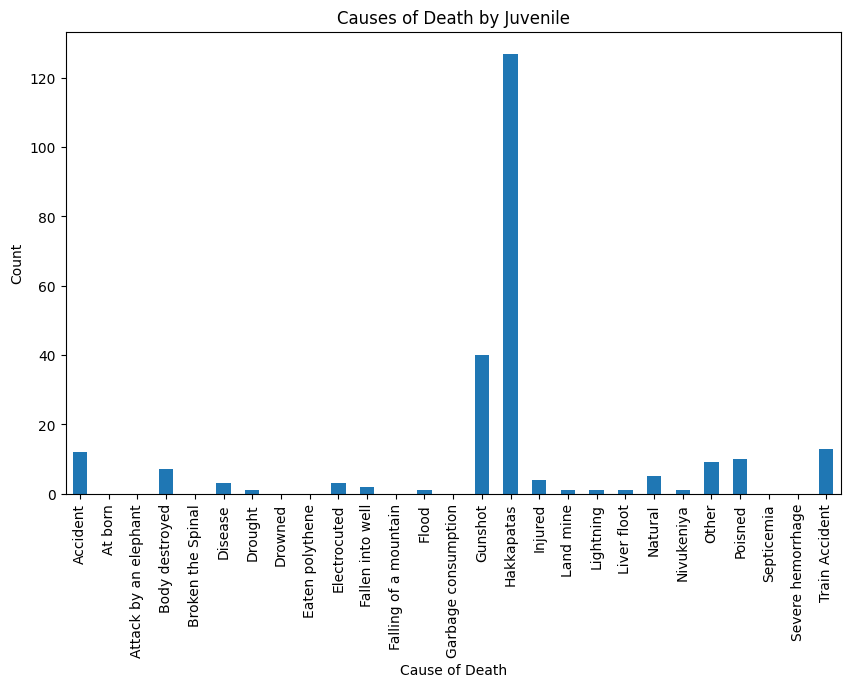

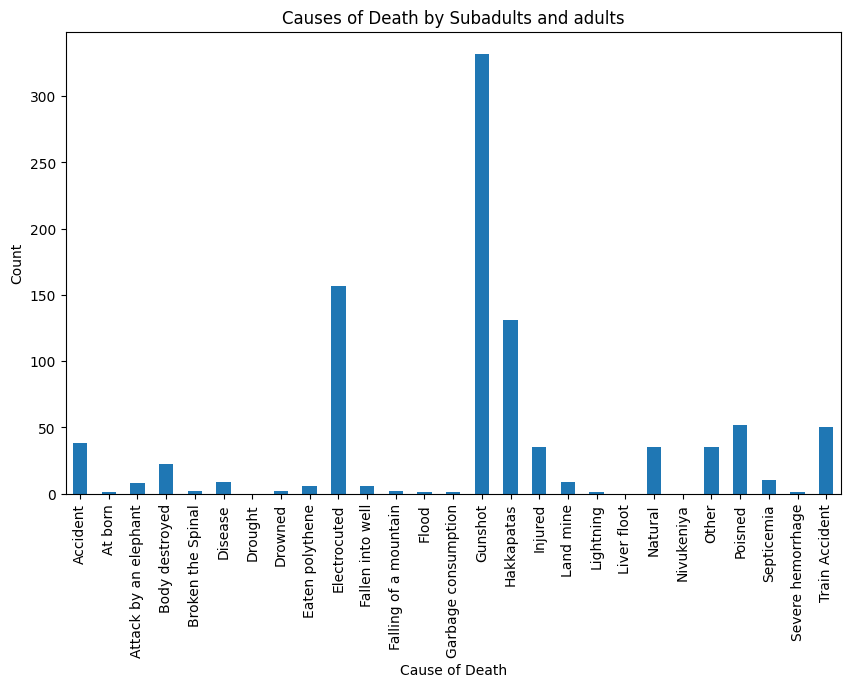

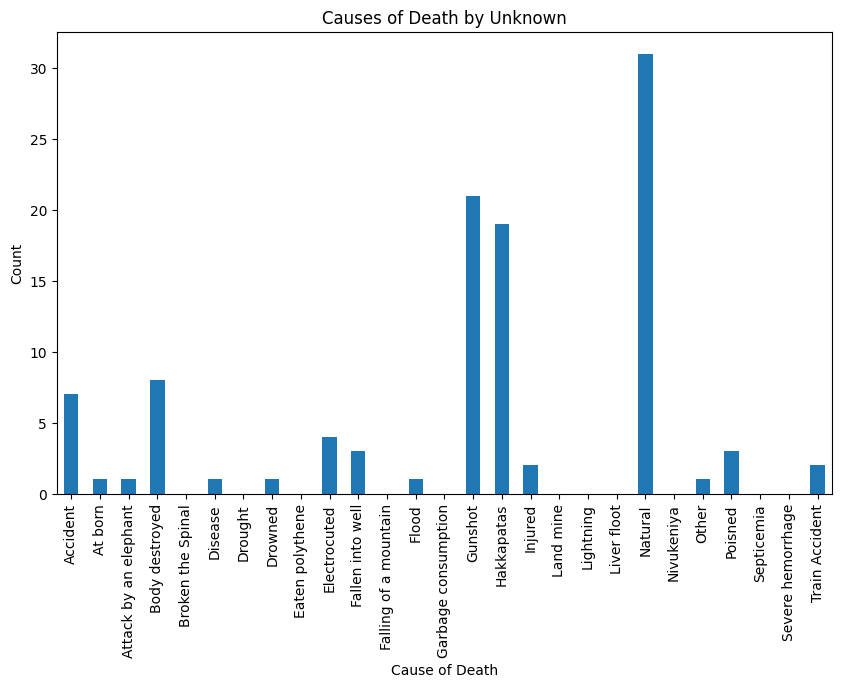

In [12]:
# Plot a bar chart for each Age Category and population
for group, data in cause_counts.iterrows():
    age_category = group
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', title=f'Causes of Death by {age_category}')
    plt.xlabel('Cause of Death')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


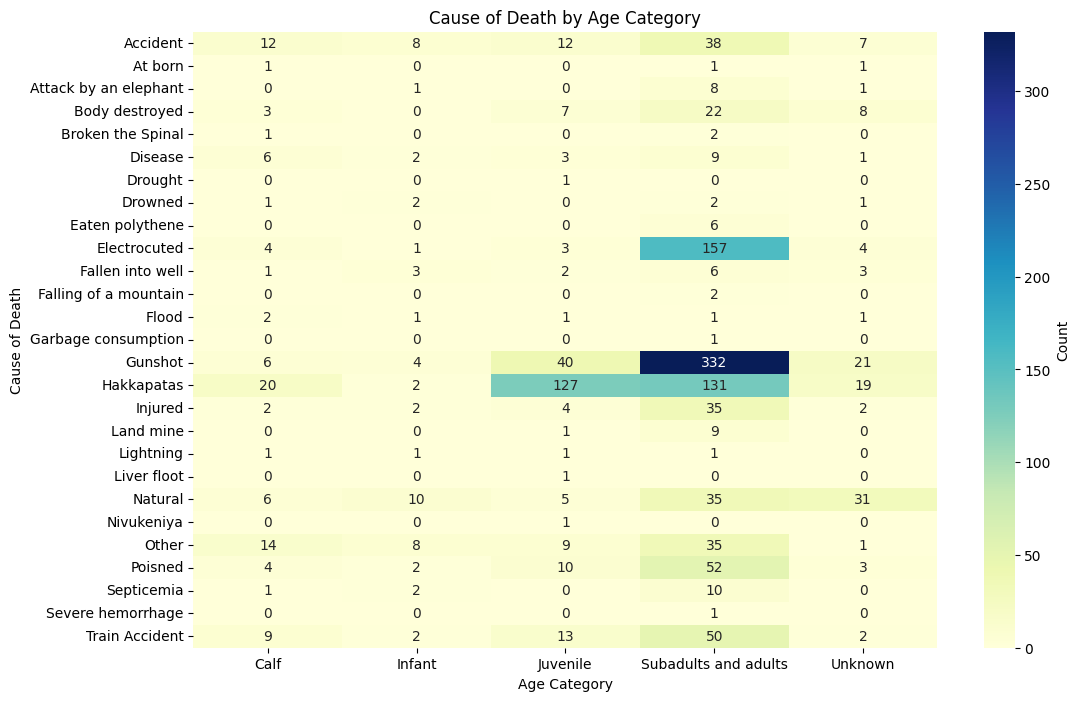

In [13]:
#Create a pivot table
pivot_table = pd.pivot_table(df, values='Age', index='Cause of Death', columns='Age Category', aggfunc='count', fill_value=0)

# Plot a heatmap for visual representation
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title('Cause of Death by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Cause of Death')
plt.show()

In [14]:
# Get the common causes with maximum counts for each row
common_causes = cause_counts.apply(lambda x: x.idxmax(), axis=1)

# Create a DataFrame with the common causes and their counts
common_causes_df = pd.DataFrame({'CommonCause': common_causes, 'Count': cause_counts.max(axis=1)})

# Reset the index
common_causes_df.reset_index(inplace=True)



In [15]:
common_causes_df

,Age Category,CommonCause,Count
0,Calf,Hakkapatas,20
1,Infant,Natural,10
2,Juvenile,Hakkapatas,127
3,Subadults and adults,Gunshot,332
4,Unknown,Natural,31


In [16]:
relevant_districts = {}
for index, row in common_causes_df.iterrows():
    age_category = row['Age Category']
    common_cause = row['CommonCause']
    relevant_districts[(age_category, common_cause)] = df[(df['Age Category'] == age_category) & (df['Cause of Death'] == common_cause)]['District'].unique()

# Display the relevant districts for each common cause of death and age category
for key, districts in relevant_districts.items():
    age_category, common_cause = key
    print(f"Age Category: {age_category}, Common Cause: {common_cause}, Relevant Districts: {districts}")

Age Category: Calf, Common Cause: Hakkapatas, Relevant Districts: ['Anuradhapura' 'Vavuniya' 'Mannar' 'Trincomalee' 'Ampara' 'Polonnaruwa'
 'Hambantota' 'Kurunegala']
Age Category: Infant, Common Cause: Natural, Relevant Districts: ['Monaragala' 'Ampara' 'Polonnaruwa' 'Matale' 'Trincomalee' 'Puttalam']
Age Category: Juvenile, Common Cause: Hakkapatas, Relevant Districts: ['Mannar' 'Anuradhapura' 'Trincomalee' 'Polonnaruwa' 'Kandy' 'Vavuniya'
 'Mullaitivu' 'Kurunegala' 'Monaragala' 'Ampara' 'Puttalam' 'Batticaloa'
 'Matale' 'Badulla']
Age Category: Subadults and adults, Common Cause: Gunshot, Relevant Districts: ['Ampara' 'Kurunegala' 'Monaragala' 'Anuradhapura' 'Trincomalee' 'Matale'
 'Hambantota' 'Badulla' 'Batticaloa' 'Polonnaruwa' 'Puttalam' 'Mannar'
 'Vavuniya' 'Ratnapura' 'Kandy' 'Kilinochchi' 'Mullaitivu']
Age Category: Unknown, Common Cause: Natural, Relevant Districts: ['Ratnapura' 'Anuradhapura']


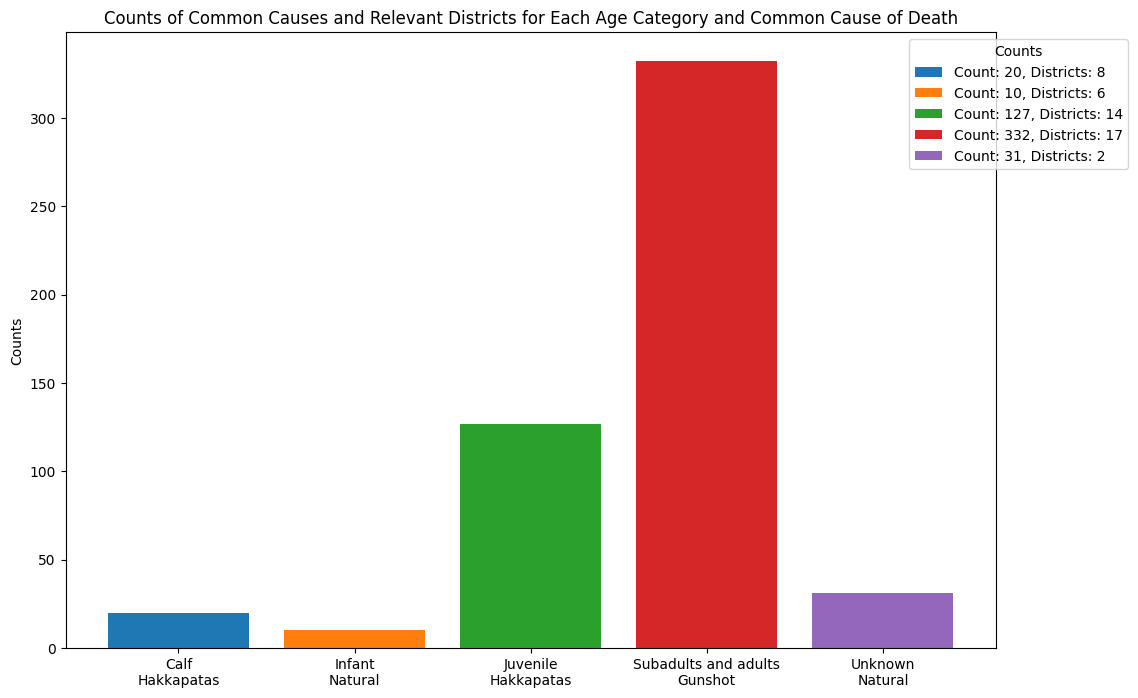

In [17]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each row in common_causes_df and plot the count of common causes and relevant districts
for index, row in common_causes_df.iterrows():
    age_category = row['Age Category']
    common_cause = row['CommonCause']
    count_common_causes = row['Count']
    
    # Count relevant districts
    relevant_districts = df[(df['Age Category'] == age_category) & (df['Cause of Death'] == common_cause)]['District'].nunique()
    
    # Plot a bar for each combination of age category and common cause of death
    ax.bar([f"{age_category}\n{common_cause}"], [count_common_causes, relevant_districts], label=f'Count: {count_common_causes}, Districts: {relevant_districts}')

# Set labels and title
ax.set_ylabel('Counts')
ax.set_title('Counts of Common Causes and Relevant Districts for Each Age Category and Common Cause of Death')
ax.legend(title='Counts', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()
